In [1]:
# !pip install scipy

In [76]:
import scipy as spy
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [15]:
import math
print(math.sqrt(225))
a = 0.05
print(1-a/2)
15/(3/1.96)

15.0
0.975


9.8

In [59]:
# ∆ = (σ /√n)* z_α 
#∆ = 3
#𝜎2  = 225
#𝜎 = 15
z_α = 1.96
n = 15 * 1.96 / 3
#  √n = 9.79
print(round(n*n))

96


In [13]:
### Ваши код/вычисления...

n = 96  #Запишите в эту переменную ваш высчитанный ответ!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [22]:
print('желаемая точность = ',(15/(math.sqrt(25)))*2.33)

желаемая точность =  6.99


In [28]:
### Ваши код/вычесления...
print('L = ', round((130 + ((15/(math.sqrt(25)))*2.33)) - (130 - ((15/(math.sqrt(25)))*2.33))))
#L = ....  #Запишите в эту переменную ваш высчитанный ответ!


L =  14


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [34]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности



In [35]:
mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

### Ваш код...
t, p_value = stats.ttest_ind(mens, womens) #Критерий Стьюдента (t-test)
t, p_value

(3.6635841716708892, 0.00024875321033580573)

In [ ]:
# Degree of freedom is = 16

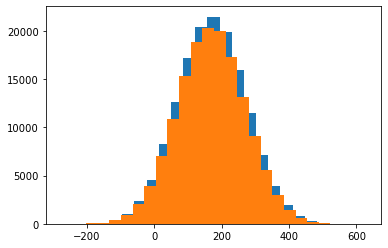

In [36]:
plt.hist(mens, bins=25); #Выборка mens
plt.hist(womens, bins=25);  #Выборка womens

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>
∆ = (σ /√n)* z_α 
∆ = 50$ рублей
a = 0.05
σ = 150$
z_α = 1.96

In [66]:
### Ваш код...
n_root = (150*1.96 / 50)
print('объем необходимой выборки для исследования среднего чека за кофе в случайном городе = ', round(n_root**2))

объем необходимой выборки для исследования среднего чека за кофе в случайном городе =  35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [67]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [74]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.
oddsratio, pvalue

significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pvalue, significance))

if pvalue < significance:
    print('Это правда эксперт!')
else:
    print('Это шарлатан!')

p-value=0.354180, significance=0.05

Это шарлатан!


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [79]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...
mean_confidence_interval(data, confidence=0.90)

NameError: name 'mean_confidence_interval' is not defined

##### Ответ

In [85]:

confidenceLevel = 0.9   # 90% CI given
degrees_freedom = len(data)-1  #degree of freedom = sample size-1
sampleMean = np.mean(data)    #sample mean
sampleStandardError = stats.sem(data)  #sample standard error

#create 90% confidence interval for the population mean
confidenceInterval = stats.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)
#print the 90% confidence interval for the population mean
print('The 90% confidence interval for the population mean :',confidenceInterval)

The 90% confidence interval for the population mean : (6.073631100387619, 7.183511753944288)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [86]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

#Ваш код:

In [93]:
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
print('t-criterea - ', t, 'p-value - ', p_value)


t-criterea -  11.865233896372924 p-value -  4.623319592204015e-25


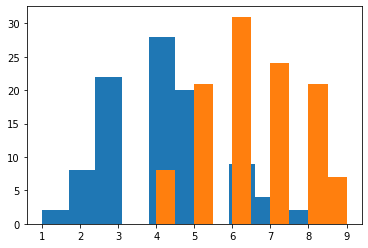

In [100]:
plt.hist(B, bins=10); #Выборка A
plt.hist(A, bins=10);  #Выборка B

In [110]:
print('количество А - ',len(A))
print('количество В - ',len(B))

количество А -  112
количество В -  95


In [120]:
df = pd.DataFrame({'a': pd.Series(A), 'b': pd.Series(B), 'a-b' : ((pd.Series(A)) - (pd.Series(B)))})
df.fillna(0)

,a,b,a-b
0,4,5.0,-1.0
1,5,6.0,-1.0
2,8,7.0,1.0
3,9,8.0,1.0
4,6,4.0,2.0
...,...,...,...
107,5,0.0,0.0
108,6,0.0,0.0
109,7,0.0,0.0
110,8,0.0,0.0


###### Сравниваем два множества

In [121]:
df.describe()

,a,b,a-b
count,112.000000,95.000000,95.000000
mean,6.446429,4.147368,2.336842
std,1.347933,1.436370,1.871457
min,4.000000,1.000000,-2.000000
25%,5.000000,3.000000,1.000000
50%,6.000000,4.000000,2.000000
75%,7.250000,5.000000,4.000000
max,9.000000,8.000000,7.000000


<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

##### Ваши выводы: 
Из тех знаний, которыми я обладаю на данный момент, общепринятая планка для p-value считается на уровне p-value = 0.05 и все
что выше данной отметки- это в пользу нулевой гипотезы, а все что ниже- в пользу альтернативной гипотезы. 
 Идеальной считается нулевая гипотеза с p-value = 0.5 , т.е. 50 % (насколько я в этом правильно разобрался.
 5 % это определенный трэшхолд.
 К ответу на вопрос: здесь стоит склониться в пользу альтернативной гипотезы с не нормальным распределением.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [123]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value
# Подсказка, обратите внимание на Two-sample T-test

(-1.95300880485141, 0.051284593140469285)

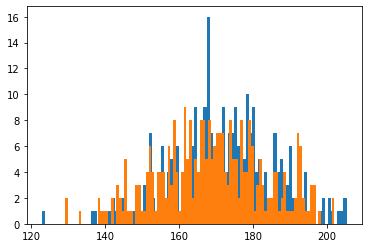

In [129]:
 plt.hist(B, bins=100); #Выборка A
plt.hist(A, bins=100);  #Выборка B

In [132]:
observed = pd.DataFrame({"препарат А":A,
                         "препарат Б":B,
                         "разница препаратов":(A-B)})
observed.describe()

,препарат А,препарат Б,разница препаратов
count,300.000000,300.000000,300.000000
mean,168.996623,171.279351,-2.282728
std,14.514851,14.112601,19.429630
min,129.200222,122.956041,-57.751642
25%,158.845516,162.917094,-14.574167
50%,168.725478,171.314729,-2.711816
75%,178.949547,179.880765,9.799642
max,202.027845,205.292058,49.073255


При p-value = 0.0512 следует принять нулевую гипотезу что разница в препаратах не значительная